Here we see how we can use the oa.prompt_function to make a python function that will describe the data you give it.

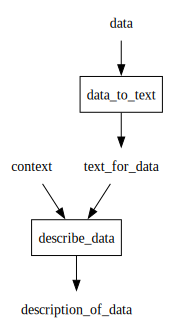

In [2]:
from meshed import code_to_dag

@code_to_dag
def cluster_description():
    text_for_data = data_to_text(data)
    description_of_data = describe_data(text_for_data, context)

cluster_description.dot_digraph()

In [3]:
import oa

describe_data = oa.prompt_function("""
Describe the data I printed below. 
Have the description be around {n_words:10} words long.
More info about the source of the data: {context: }.
                                   
The data:
                                   
{data}
""")

# note that describe_data is a python function with arguments, defaults, etc.
describe_data


<function oa.tools.prompt_function.<locals>.ask_oa(data, *, n_words='10', context=' ')>

Let's try this out with the github repo data.

In [6]:
from imbed_data_prep.github_repos import *

d = GithubReposData()

In [9]:
def indices_of_first_rows(df, n_rows=20):
    """A data_to_text function that returns the indices of the first n_rows of a dataframe."""
    t = df.iloc[:n_rows]
    return '\n'.join(t.index.values)

print(indices_of_first_rows(d.raw_data))

xdedzl/RuntimeTerrainEditor
realvect0r/leetcode-api
vippsas/vipps-developers
NetManAIOps/Squeeze
mdolab/MACH-Aero
daily-co/daily-js
NREL/ReEDS-2.0
gadenbuie/grkstyle
guanpj/JReadHub
exp-sky/AsiaSecWest-2018-Chakra-vulnerability-and-exploit-bypass-all-system-mitigation
dukelec/cdpga
pjgao/eplot
dalenguyen/firebase-functions-helper
enovella/ida2ghidra-kb
JazzyWagdaddy/AzureStudyGroups-AZ-203
simonwongwong/Facebook-Messenger-Statistics
uber/simple-store
al-one/certbot-auth-dnspod
digitalbitbox/bitbox-base
BillyWei01/Doodle


In [10]:
data_context = describe_data(indices_of_first_rows(d.raw_data))
data_context

'These are different repositories found on the coding platform, Github.'

Let's now select a subset of the data taken from a cluster, and feed our function the descriptions of it.

In [14]:
# get the smallest cluster
from collections import Counter
dflt_cluster_idx, num_of_rows = Counter(d.cluster_indices.clusters_34).most_common()[-1]
dflt_cluster_idx, num_of_rows

(22, 36430)

In [21]:
def descriptions_of_cluster(
    d, *, cluster_idx=dflt_cluster_idx, max_description_length=100, n_samples=500,
):
    """A data_to_text function that returns the descriptions of a cluster"""
    import numpy as np

    indices = d.cluster_indices[d.cluster_indices.clusters_34 == cluster_idx].index
    random_sample_of_indices = np.random.choice(indices, n_samples)
    sample_indices = d.raw_data.loc[random_sample_of_indices, 'description'].values
    descriptions_text = '\n\n'.join(
        map(lambda x: x[:max_description_length] + '...', filter(None, sample_indices))
    )
    return descriptions_text

descriptions_text = descriptions_of_cluster(d)
print(f"{len(descriptions_text)} characters")

26904 characters


In [18]:
# should be something about go language
print(describe_data(descriptions_text))

The data lists numerous GoLang projects or tools with brief descriptions of their functionalities.


In [23]:
# Confirmation that these are go language repos
key_text = 'go'
idx = d.cluster_indices[d.cluster_indices.clusters_34 == dflt_cluster_idx].index
r = sum(key_text in x.lower() for x in d.raw_data.loc[idx, 'languages'].values) / len(idx)
print(f"{r * 100:.2f}% of the repos in cluster mention {key_text} in their langauges.")

84.04% of the repos in cluster mention go in their langauges.


In [24]:
# try with another cluster
print(describe_data(descriptions_of_cluster(d, cluster_idx=0)))

These are descriptions of different coding projects and software plugins.


In [25]:
# again
print(describe_data(descriptions_of_cluster(d, cluster_idx=0)))

The data consists of various software project descriptions, often including technologies used and project functionality.
